In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Basic Libraries 📚
import pandas as pd
import xlrd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [3]:
# Basic Modules & Useful Installations:
import warnings
warnings.simplefilter(action='ignore')
from geopy.distance import geodesic

In [4]:
# Completed Caracterization 🔧 

def data_caracterization(df):
    
    columns = df.columns.tolist()
    (dfrows,dfcolumns) = df.shape
    df.reset_index()
    print(f'Caracterization:\n')
    print(f'Number of Rows: {dfrows}\n')
    print(f'Number of Columns: {dfcolumns}\n')
    print(f'Columns Names/Variables/Features: {columns}\n')
    df.info()
    print(f'\n Head:\n')
    
    return df.head(5)

In [5]:
# Sum & Return duplicates, NaN & two empty spaces 🔧 

def data_explore(df):
    
    duplicate_rows = df.duplicated().sum()
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {df.duplicated().sum()} duplicate rows. Also;")
    
    return exploration

In [6]:
# Clean Special Characters

def clean_special_characters(text):
    
    cleaned_text = text.replace("u202f", " ").replace("u2009", " ")
    
    return cleaned_text

In [7]:
# Construct Type Column

def urban_type(city):
    
    if city in cities:
        return "City"
    elif city in towns:
        return "Town"
    elif city in villages:
        return "Village"
    else:
        return None


In [8]:
# Construct Beach Column

def beach_no_beach(city):
    beach
    if city in beach:
        return 1
    else:
        return 0

In [9]:
# Construct Wild distance

def calculate_distance_row(row):
    
    coordinates_1 = (row['lat_buf'], row['long_buf'])
    coordinates_2 = (row['latitude'], row['longitude'])
    
    return geodesic(coordinates_1, coordinates_2).kilometers

In [10]:
# Construct Wild Column

def into_the_wild(row):

    city_type = row['type']
    distance_km = row['distance_km']
    
    if city_type == "City" and distance_km >= wild_radius_cities:
        return 1
    elif city_type == "Town" and distance_km >= wild_radius_towns:
        return 1
    elif city_type == "Village" and distance_km >= wild_radius_villages:
        return 1
    else:
        return 0


In [11]:
# Construct reading relative path
relative_path = "my-jobcation-path/02_data_cleaning_phase/00_First Clean & SQL/coworkings_distinct.csv"
relative_path2 = "my-jobcation-path/02_data_cleaning_phase/00_First Clean & SQL/campsites_distinct.csv"
relative_path3 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/geolocations.csv"
relative_path4 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/cities.txt"
relative_path5 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/towns.txt"
relative_path6 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/villages.txt"
relative_path7 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/beach.txt"

# Change directory
os.chdir('C:\\Users\\Oscar\\Documents\\00_Ironhack\\P3_Final\\') #Change for your own directory

# Check directory
current_directory = os.getcwd()
print("Current working directory is:", current_directory)

Current working directory is: C:\Users\Oscar\Documents\00_Ironhack\P3_Final


In [12]:
# Construct absolute paths

coworkings_path = os.path.join(current_directory, relative_path)
campsites_path = os.path.join(current_directory, relative_path2)
geolocations_path = os.path.join(current_directory, relative_path3)
cities_path = os.path.join(current_directory, relative_path4)
towns_path = os.path.join(current_directory, relative_path5)
villages_path = os.path.join(current_directory, relative_path6)
beach_path = os.path.join(current_directory, relative_path7)

In [13]:
# Read cities, towns villages and beachs from a txt file

with open(cities_path , 'r', encoding='utf-8') as file:
    cities = []
    cities.extend(file.read().splitlines()) 
with open(towns_path, 'r', encoding='utf-8') as file:
    towns = []
    towns.extend(file.read().splitlines()) 
with open(villages_path , 'r', encoding='utf-8') as file:
    villages = []
    villages.extend(file.read().splitlines()) 
with open(beach_path, 'r', encoding='utf-8') as file:
    beach = []
    beach.extend(file.read().splitlines()) 

In [14]:
# Coworkings reading

if os.path.exists(coworkings_path):
    try:
        # Try to read the CSV file
        data = pd.read_csv(coworkings_path)
        print("The file has been loaded successfully.")
        # Now you can work with the 'data' DataFrame
    except Exception as e:
        print("An error occurred while reading the file:", e)
else:
    print("The file does not exist at the specified path:", coworkings_path)

The file has been loaded successfully.


In [15]:
# Campsites reading

if os.path.exists(campsites_path):
    try:
        # Try to read the CSV file
        data2 = pd.read_csv(campsites_path)
        print("The file has been loaded successfully.")
        # Now you can work with the 'data' DataFrame
    except Exception as e:
        print("An error occurred while reading the file:", e)
else:
    print("The file does not exist at the specified path:", coworkings_path)

The file has been loaded successfully.


In [16]:
# Geolocations reading

if os.path.exists(geolocations_path):
    try:
        # Try to read the CSV file
        data3 = pd.read_csv(geolocations_path)
        print("The file has been loaded successfully.")
        # Now you can work with the 'data' DataFrame
    except Exception as e:
        print("An error occurred while reading the file:", e)
else:
    print("The file does not exist at the specified path:", geolocations_path)

The file has been loaded successfully.


In [17]:
# Dataframe Creation

dfco = data.copy()
dfca = data2.copy()
dfgeo = data3.copy()

In [18]:
data_explore(dfgeo)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
name,0,0
city,0,0
type,0,0
Latitude,831,0
Longitude,831,0


First Step: Concat and Merge dataframes for correct NaN treatment

In [20]:
# Delete City and Reorder Columns in GEO Dataframe

column_order = ["name",	"type",	"Longitude", "Latitude"] 

dfgeo.drop(columns ="city", inplace = True)
dfgeo = dfgeo[column_order]

In [21]:
# Reorder columns in Coworkings and Campsites

column_order2 = ["name", "address", "rating", "website","schedule", "longitude", "latitude","city"]
dfco = dfco[column_order2]
dfca = dfca[column_order2]

Concat & Merge both dataframes for detect NaNs in LAT and LONG to delete in all dataframes:

In [23]:
# Concat & Merge

dfconcat = pd.concat([dfca,dfco], ignore_index = True)


In [24]:
dfmerge = pd.merge(dfconcat, dfgeo, on ="name", how ="inner")

In [25]:
# Duplicates need to delete

dfmerge = dfmerge.drop_duplicates()

In [26]:
dfmerge = dfmerge.reset_index()
dfmerge = dfmerge.drop("index", axis = 1)
data_caracterization(dfmerge)

Caracterization:

Number of Rows: 7430

Number of Columns: 11

Columns Names/Variables/Features: ['name', 'address', 'rating', 'website', 'schedule', 'longitude', 'latitude', 'city', 'type', 'Longitude', 'Latitude']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       7430 non-null   object 
 1   address    7430 non-null   object 
 2   rating     7430 non-null   object 
 3   website    7430 non-null   object 
 4   schedule   7430 non-null   object 
 5   longitude  7430 non-null   float64
 6   latitude   7430 non-null   float64
 7   city       7430 non-null   object 
 8   type       7430 non-null   object 
 9   Longitude  6560 non-null   float64
 10  Latitude   6560 non-null   float64
dtypes: float64(4), object(7)
memory usage: 638.6+ KB

 Head:



,name,address,rating,website,schedule,longitude,latitude,city,type,Longitude,Latitude
0,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,3.9,http://www.campingosuna.com/,[Monday: 8:00\u202fAM\u2009–\u200911:30\u202fP...,-3.703790,40.416775,Madrid,camp,-3.603361,40.453734
1,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,3.9,http://www.campingosuna.com/,[Monday: 8:00\u202fAM\u2009–\u200911:30\u202fP...,-3.368802,40.484390,Alcalá de Henares,camp,-3.603361,40.453734
2,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,3.9,http://www.campingosuna.com/,[Monday: 8:00\u202fAM\u2009–\u200911:30\u202fP...,-3.803548,40.290206,Fuenlabrada,camp,-3.603361,40.453734
3,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,3.9,http://www.campingosuna.com/,[Monday: 8:00\u202fAM\u2009–\u200911:30\u202fP...,-3.475497,40.456755,Torrejón de Ardoz,camp,-3.603361,40.453734
4,Camping Osuna,C. Jardines de Aranjuez s/n Madrid,3.9,http://www.campingosuna.com/,[Monday: 8:00\u202fAM\u2009–\u200911:30\u202fP...,-3.773987,40.237306,Parla,camp,-3.603361,40.453734


In [27]:
data_explore(dfmerge)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
name,0,0
address,0,0
rating,0,0
website,0,0
schedule,0,0
longitude,0,0
latitude,0,0
city,0,0
type,0,0
Longitude,870,0


In [28]:
# DropNa all (LAN and LONG NaNs are in the same rows, they are entire locations that Google Maps couldn´t retrive)

dfmerge = dfmerge.dropna(subset=['Latitude'])

In [29]:
data_explore(dfmerge)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
name,0,0
address,0,0
rating,0,0
website,0,0
schedule,0,0
longitude,0,0
latitude,0,0
city,0,0
type,0,0
Longitude,0,0


RATING NO AVAILABLE: Fill with median of values and treat as Float:

In [31]:
# Filter out 'Rating not available' values.

filtered_df = dfmerge[dfmerge['rating'] != 'Rating not available']

# Calculate the mode of the 'Rating' column

filtered_df['rating'] = filtered_df['rating'].astype(float)
median_rating = filtered_df['rating'].median()

print("Median of Rating (excluding 'Rating not available'):", median_rating)


Median of Rating (excluding 'Rating not available'): 4.4


In [32]:
# Fill "Rating not available"

dfmerge['rating'] = dfmerge['rating'].apply(lambda x: median_rating if x == "Rating not available" else x)
dfmerge['rating'] = dfmerge['rating'].astype(float)

In [33]:
# Schedule and City Standarization  and Clean

dfmerge['schedule'] = dfmerge['schedule'].apply(lambda x: clean_special_characters(x))
dfmerge['schedule'] = dfmerge['schedule'].explode().str.replace("[", "").str.replace("]", "").str.replace('\\', '')
dfmerge["city"]  = dfmerge["city"].str.strip()

In [34]:
# Column Rename  Lat and Long 

dfmerge.rename(columns={'latitude': 'lat_buf', 'longitude': 'long_buf', 'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)


In [35]:
# Separate Dataframes and Drop Type Column, Set Index for Columns

dfcamps = dfmerge.groupby("type").get_group("camp")
dfcoworks = dfmerge.groupby("type").get_group("cowork")

dfcamps = dfcamps.drop("type", axis = 1)
dfcoworks = dfcoworks.drop("type", axis = 1)
dfcoworks = dfcoworks.reset_index(drop=True)

In [36]:
# Type and Beach Column Creation

dfcamps["type"] = dfcamps["city"].apply(urban_type)
dfcamps["beach"] = dfcamps["city"].apply(beach_no_beach)


In [37]:
# Drop 6 columns not recognized by city: Inconsistent data in type

dfcamps = dfcamps.dropna()

In [38]:
# Wild Column Creation

dfcamps["distance_km"] = dfcamps.apply(calculate_distance_row, axis=1)
wild_area_for_cities = dfcamps['distance_km'].loc[dfcamps["type"] == "City"]

wild_area_for_cities.describe()

count      519.000000
mean       137.846346
std        806.319598
min          0.000000
25%         24.133757
50%         38.894278
75%         49.711731
max      10225.266596
Name: distance_km, dtype: float64

In [39]:
wild_area_for_towns = dfcamps['distance_km'].loc[dfcamps["type"] == "Town"]

wild_area_for_towns.describe()

count     1809.000000
mean       133.689864
std        781.549316
min          0.000000
25%         25.777878
50%         37.609602
75%         49.212874
max      10191.628509
Name: distance_km, dtype: float64

In [40]:
wild_area_for_village = dfcamps['distance_km'].loc[dfcamps["type"] == "Village"]

wild_area_for_village.describe()

count     1241.000000
mean       183.802692
std       1079.927407
min          0.598539
25%         23.319630
50%         37.000622
75%         48.181108
max      11603.148307
Name: distance_km, dtype: float64

In [41]:
wild_radius_cities = wild_area_for_cities.quantile(0.95) # Distance needed according to descriptive information to be in the wilderness and close to a city
wild_radius_towns = wild_area_for_towns.quantile(0.35) # Distance needed according to descriptive information to be in the wilderness and close to a town
wild_radius_villages = wild_area_for_village.quantile(0.15) # Distance needed according to descriptive information to be in the wilderness and close to a village

dfcamps['wild'] = dfcamps.apply(into_the_wild, axis = 1)

In [42]:
# Luxury-words serch.

luxury_finder = dfcamps["name"].tolist()
text = ''.join(map(str, luxury_finder))

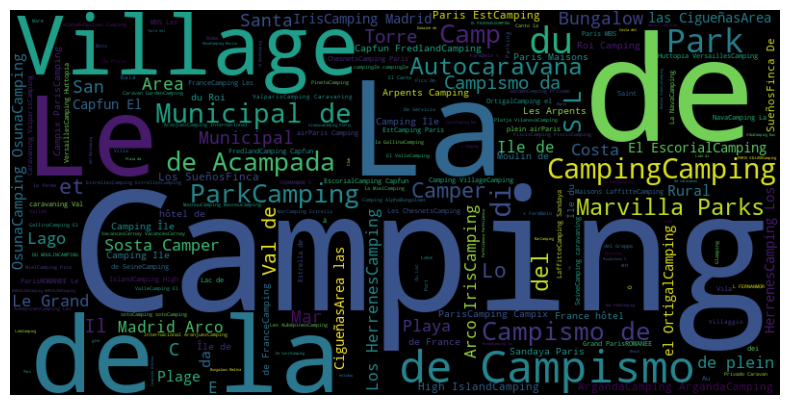

In [43]:
#Create wordcloud object for look for LUXURY WORDS

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

#Show the Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
# Construct luxury option

search_glamping = ["Glamping", "GLAMPING", "GLAMP", "glamping", "Kampaoh", "Domo", "dome", "Cabañas", "Cabana", "glamp", "eco", "village", "Village", "Bungalow", "bungalow"]
search_camper = ["Caravana", "Caravan", "Autocaravana", "caravan", "Autocaravan", "autocaravan", "camper", "Camper","mobil-home"]



dfcamps['luxury'] = dfcamps['name'].apply(lambda x: 'Glamping' if any(word in x for word in search_glamping) else ('Camper' if any(word in x for word in search_camper) else 'Campsite'))

       

In [45]:
# Distance between coworking and the main city

dfcoworks["distance_km"] = dfcoworks.apply(calculate_distance_row, axis=1)

In [46]:
# COLUMN REORGANIZATION

column_order_cow = ["name",	"address",	"city",	"website", "schedule", "longitude", "latitude", "distance_km", "rating", "long_buf", "lat_buf",] 

dfcoworks = dfcoworks[column_order_cow]

column_order_camps = ["name", "address", "city", "website", "schedule", "longitude", "latitude", "distance_km", "type", "luxury", "beach", "wild", "rating", "long_buf", "lat_buf"] 

dfcamps = dfcamps[column_order_camps]

In [47]:
# Construct reading relative path
relative_path8 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/coworkings_chars.csv"
relative_path9 = "my-jobcation-path/02_data_cleaning_phase/01_Preprocessing & Clean/campsites_chars.csv"

# Construct absolute paths
coworkings_save_path = os.path.join(current_directory, relative_path8)
campsites_save_path = os.path.join(current_directory, relative_path9)

In [48]:
# Save and Encoding 

dfcoworks.to_csv(coworkings_save_path, index=False, encoding='utf-8')
dfcamps.to_csv(campsites_save_path, index=False, encoding='utf-8')